
* **Nombre y cédula del integrante 1 del grupo:** Julián Alejandro Úsuga Ortiz 1001137545
* **Nombre y cédula del integrante 1 del grupo:** Ivan Santiago Rojas Martinez 

# Parcial 2 -  Enunciados

Considere las tres series de tiempo que aparecen en cada una de las hojas de excel del archivo __datos_parcial2.xlsx__.

Importe cada una de las tres series de tiempo y para cada una de ellas resuelva lo siguiente en Python:

1. Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

2. Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.

3. Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

4. Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.

5. Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

6. Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.

7. Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

8. Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

En la primera celda del trabajo ubique los nombres de los integrantes del grupo de la siguiente forma:

- __Nombre y cédula del integrante 1 del grupo:__



- __Nombre y cédula del integrante 2 del grupo:__


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

def printfuller(test_res):
    """ null hypothesis is that a unit root is present in a time series sample."""
    print("Prueba de Dickey Fuller")
    print(f"The test statistic: \t {round(test_res[0], 10)}")
    print(f"p-value: \t \t {test_res[1]}")

plt.style.use('fivethirtyeight')

from warnings import filterwarnings
filterwarnings('ignore')

### Base de Datos:

In [2]:
s1 = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name="serie1", parse_dates=["fecha"])
data = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name="datos2", parse_dates=["date"])
s3 = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name="tercera", parse_dates=["dia"])

### <center> Serie de tiempo 1

### Breve exploración de la DB:

In [3]:
s1.shape

(231, 2)

In [4]:
s1.dtypes

fecha    datetime64[ns]
valor           float64
dtype: object

In [5]:
s1.head()

,fecha,valor
0,2021-01-01,0.06
1,2021-01-02,0.05
2,2021-01-03,0.05
3,2021-01-04,0.51
4,2021-01-05,2.03


In [6]:
s1.tail()

,fecha,valor
226,2021-08-15,16.90
227,2021-08-16,17.35
228,2021-08-17,18.85
229,2021-08-18,21.40
230,2021-08-19,22.60


In [7]:
s1.set_index("fecha", inplace=True)
s1

,valor
fecha,
2021-01-01,0.06
2021-01-02,0.05
2021-01-03,0.05
2021-01-04,0.51
2021-01-05,2.03
...,...
2021-08-15,16.90
2021-08-16,17.35
2021-08-17,18.85


Se lee y se carga la base de datos, la base de datos cuenta con 231 datos y 2 variables(fecha, valor) las cuales se proceden a darle el formato adecuado a la serie de tiempo. Los datos van desde el 1 de enero del 2021 hasta el 19 de agosto del 2021. 

## 1.

Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

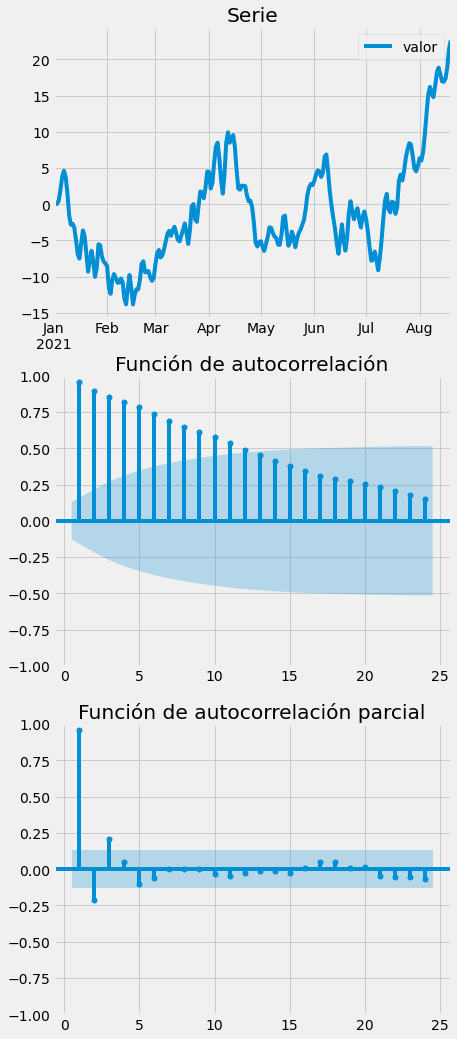

In [8]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
s1.plot(ax=ax[0], title = "Serie", xlabel="")
plot_acf(s1, zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(s1, method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

Del gráfico de la serie de tiempo no se observa que sea estacionaria, procedemos a observar la función de autocorrelación la cual presenta un decaimiento exponencial lo cual nos da indicios de tener que hacer una diferenciación.

Se realizará una prueba de Dickey-Fuller para verificar si es necesario realizar una diferenciación.

## 2.

Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.


In [9]:
test = adfuller(s1)
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -0.6940413117
p-value: 	 	 0.8482869409753928


Observando el p-valor = 0.8482869409753928 y con una significancia de \alpha = 0.05 no se rechaza. Esto quiere decir que no hay estacionaridad en la serie, lo que nos indica que debemos realizar una diferenciación. 

## 3.

Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

In [10]:
s1_aux_dif = s1.diff()
s1_aux_dif

,valor
fecha,
2021-01-01,NaN
2021-01-02,-0.01
2021-01-03,0.00
2021-01-04,0.46
2021-01-05,1.52
...,...
2021-08-15,-0.06
2021-08-16,0.45
2021-08-17,1.50


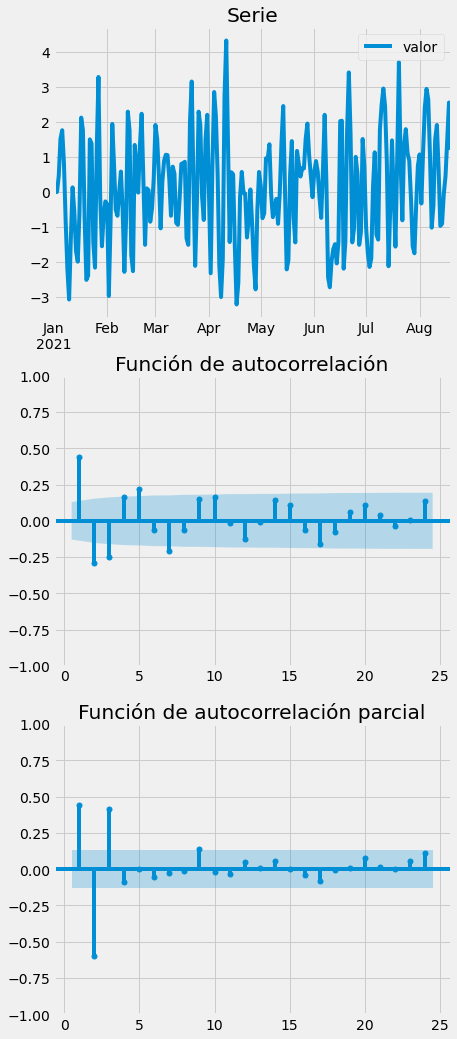

In [11]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
s1_aux_dif.plot(ax=ax[0], title = "Serie", xlabel="")
plot_acf(s1_aux_dif.dropna(), zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(s1_aux_dif.dropna(), method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()



Despues de hacer una diferenciación y observando la serie diferenciada se obtiene estacionaridad alrededor de 0. Se realizara una prueba Dickey-Fuller para verificar si es necesario realizar otra diferencia. 

In [12]:
test = adfuller(s1_aux_dif.dropna())
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -6.9049727761
p-value: 	 	 1.2540124522199944e-09


Observando el p-valor =    $ 1.25 * 10^{-9} < \alpha = 0.05 $  se rechaza. Esto quiere decir que hay estacionaridad en la serie. 

No es muy claro de forma grafica que modelo usar. Pero en busca del mejor modelo posible se tiene los siguientes factores en cuenta: 

La **ACF** no presenta el decaimiento exponencial luego de ser diferenciada, en cambio se puede observar un onda sinusoidal amortiguada. En la **PACF** pareciera tener un corte en lag 2, por lo que se plantea un ARIMA(2, 1, 0) el cual sera comparado con diversos modelos. 

## 4. 

Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.


Se plantean los siguientes modelos, si a ojo del observador ocurre los siquiente:
* modelo 1 = ARIMA(2, 1, 0) si la ACF tiene un comportamiento sinusoidal, la PACF tiene un corte en el lag 2, y 1 diferencia. 

* modelo 2 = ARIMA(0, 1, 5) si la ACF tiene un corte en el lag 5, la PACF tiene un comportamiento sinusoidal, y 1 diferencia. 

* modelo 3 = ARIMA(2, 1, 5) si la ACF tiene un corte en el lag 5, la PACF tiene un corte en el lag 2, y 1 diferencia. 

* modelo 4 = ARIMA(3, 1, 0) si la ACF tiene un comportamiento sinusoidal, la PACF tiene un corte en el lag 3, y 1 diferencia. 

In [13]:
model1 = ARIMA(s1.valor, order=(2, 1, 0)).fit()
model2 = ARIMA(s1.valor, order=(0, 1, 5)).fit()
model3 = ARIMA(s1.valor, order=(2, 1, 5)).fit()
model4 = ARIMA(s1.valor, order=(3, 1, 0)).fit()


In [14]:
print("AIC")
print(model1.aic, model2.aic, model3.aic, model4.aic)
print("BIC")
print(model1.bic, model2.bic, model3.bic, model4.bic)

AIC
699.607727516653 666.8536978819373 662.4155801037577 657.7230431825426
BIC
709.9219654434226 687.4821737354764 689.9202145751433 671.4753604182354


De los 4 modelos planteados se toma el modelo 4 como el mejor modelo de los 4 comparados por el criterio de menor **AIC** y **BIC** 

## 5. 

Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

In [15]:
model4.arroots

array([0.24816545-1.18791377j, 0.24816545+1.18791377j,
       1.62943608-0.j        ])

In [16]:
ar_p = [1, *-model4.arparams] # modelo.arparams devuelve los parametros del modelo desde el lag 1 hasta el ultimo lag
ar_p.reverse()
abs(np.roots(ar_p))

array([1.62943608, 1.2135589 , 1.2135589 ])

Como las raices son mayores a 1, el modelo obtenido es estacionario.

## 6. 

Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.


In [17]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -324.862
Date:                Tue, 04 Oct 2022   AIC                            657.723
Time:                        16:55:22   BIC                            671.475
Sample:                    01-01-2021   HQIC                           663.270
                         - 08-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9507      0.059     16.213      0.000       0.836       1.066
ar.L2         -0.8858      0.065    -13.691      0.000      -1.013      -0.759
ar.L3          0.4167      0.060      6.920      0.000       0.299       0.535
sigma2         0.9800      0.103      9.481      0.000       0.777       1.183
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.56   Prob(JB):                         0.45
Heteroskedasticity (H):               1.21   Skew:                             0.07
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

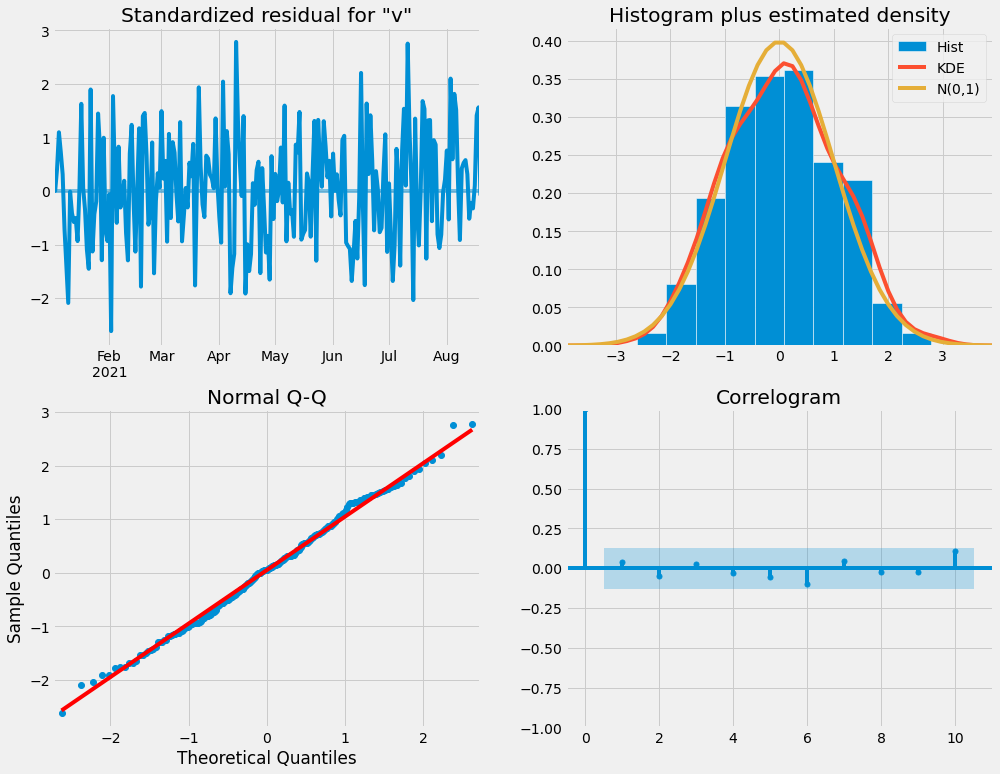

In [18]:
model4.plot_diagnostics(figsize=(15,12))
plt.show()

In [19]:
sm.stats.acorr_ljungbox(model4.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.339442,0.560152
2,0.911694,0.633911
3,1.057063,0.787448
4,1.302026,0.861032
5,2.016187,0.846901
6,4.308090,0.635060
7,4.822493,0.681615
8,4.949329,0.762978
9,5.082444,0.827063
10,7.828782,0.645557


Observando el correlograma no se percibe autocorrelación en los residuales. Y Como se puede ver en la tabla anterior el test no rechaza la hipótesis nula en ningún lag desde 1 hasta 10, ya que todos los p-valores son bastante altos y mayores a un nivel de significancia del 0.05, por lo que se puede decir que la correlación entre los errores ($Corr[e_t, e_{t-h}]$) desde h = 1 hasta 10 es 0.


## 7. 

Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

Observando el qqplot del grafico del literal 6 y dado que la mayoría de datos siguen la tendencia lineal de manera gráfica, pareciera cumplir normalidad. Para ello verificaremos con una prueba de Jarque Bera.

In [20]:
from scipy import stats
stats.jarque_bera(model4.resid)

Jarque_beraResult(statistic=1.520435840308218, pvalue=0.4675645241738078)

Con un p-valor = pvalue=0.4675645241738078 > $ \alpha = 0.05 $ no se rechaza la hipotesis de normalidad. Lo que nos indica que se cumple el supuesto de normalidad. 

## 8. 
Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [21]:
fore = model4.get_forecast(5)
fore_ci = fore.conf_int()

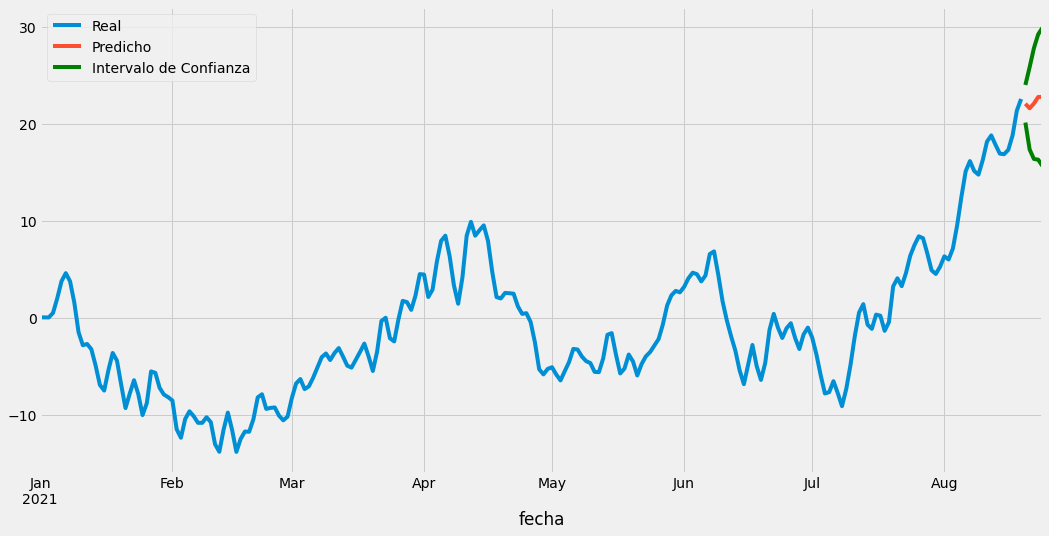

In [22]:
plt.figure(figsize=(16,8))  #  Graficamos:
s1.valor.plot()
fore.predicted_mean.plot()
fore_ci.iloc[:,0].plot(color="green")
fore_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])

In [23]:
fore_ci

,lower valor,upper valor
2021-08-20,20.166778,24.047314
2021-08-21,17.384726,25.891271
2021-08-22,16.411976,27.845631
2021-08-23,16.336441,29.274568
2021-08-24,15.682681,29.954566


In [24]:
fore.predicted_mean

2021-08-20    22.107046
2021-08-21    21.637998
2021-08-22    22.128804
2021-08-23    22.805504
2021-08-24    22.818624
Freq: D, Name: predicted_mean, dtype: float64

Con un confianza del 95%. Se pronostica que: 
* Para el 2021-08-20 se espera que el  valor sea de 22.107046 que puede fluctuar entre un intervalo que va de 20.166778 hasta 24.047314. 

* Para el 2021-08-21 se espera que el  valor sea de 21.637998 que puede fluctuar entre un intervalo que va de 17.384726 hasta 25.891271. 

* Para el 2021-08-22  se espera que el  valor sea de 22.128804 que puede fluctuar entre un intervalo que va de 16.411976 hasta 27.845631. 

* Para el 2021-08-23  se espera que el  valor sea de 22.805504 que puede fluctuar entre un intervalo que va de 16.336441 hasta 29.274568. 

* Para el 2021-08-24 se espera que el  valor sea de 22.818624 que puede fluctuar entre un intervalo que va de 15.682681 hasta 29.954566.

Se puede observar que a medida que se pronostica más valores a futuro el intervalo de confianza se aumentá, perdiendo precisión en el pronóstico.

### <center> Serie de tiempo 2

### Breve exploración de la DB:

In [25]:
data.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [26]:
data.shape

(521, 2)

In [27]:
data.set_index("date", inplace=True)

In [28]:
data

,value
date,
2020-01-01,-0.89
2020-01-02,-0.99
2020-01-03,-1.62
2020-01-04,-1.13
2020-01-05,-0.91
...,...
2021-05-31,-92.78
2021-06-01,-91.90
2021-06-02,-92.96


Se transforman los datos a un formato deseado, como se puede ver la serie tiene 521 observaciones que van desde 1 de enero de 2020 hasta el 4 de junio de 2021

## 1.

Realice los gráficos ACF y PACF para tratar de identificar los órdenes 𝑝, 𝑑 y 𝑞 del modelo ARIMA(𝑝, 𝑑, 𝑞). Saque conclusiones argumentando cada una.

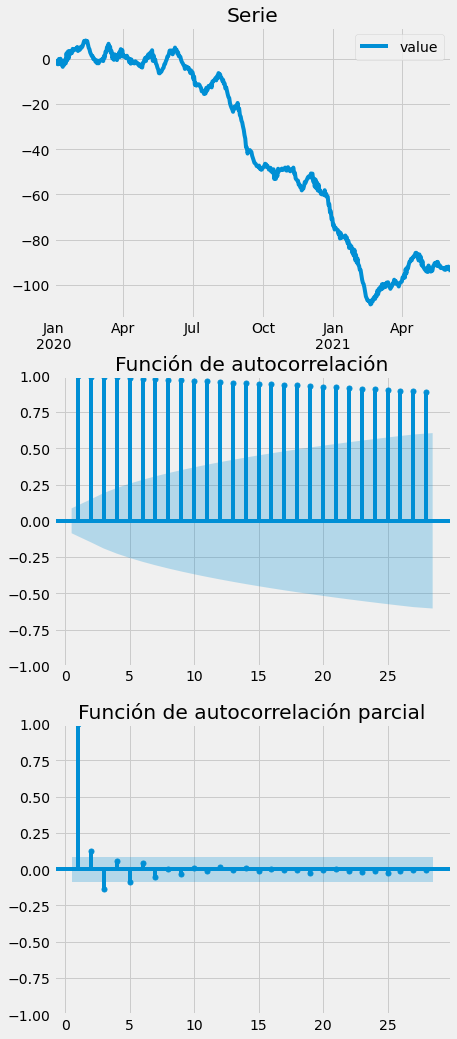

In [29]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
data.plot(ax=ax[0], title = "Serie", xlabel="")
plot_acf(data, zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(data, method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

Se puede ver en el primer grafico que la serie no parece ser estacionaria.

El grafico de la ACF nos puede ayudar para ver si la diferenciación es necesaria. Si el polinomio $φ(z)(1 − z)^d$ tiene una raiz unitaria, la ACF muestral no va a decaer a 0 rapidamente mientras los Lags incrementan. Este lento decaimiento nos indica que una diferenciacion es necesaria. 

Como podemos ver en el grafico de la ACF mientras se aumenta los Lags se decae lentamente. Para confirmar nuestras sospechas vamos a realizar la prueba Dickey Fuller

## 2.

Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de 𝑑). Saque conclusiones argumentando cada una.

In [30]:
test = adfuller(data)
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -0.1828263553
p-value: 	 	 0.9405379503085121


Se realiza el test de Aumentado de Dickey-Fuller y se no rechaza entonces puedo afirmar que hay una raiz unitaria presente y el modelo no es estacionario.

Por esta razón hago una diferencia a mis datos originales, se pierde un dato ya que el primer registro de la serie no tiene un dato anterior para generar esta diferencia.

In [31]:
data_no_diff = data.copy()
data = data.value.diff().dropna()
data

date
2020-01-02   -0.10
2020-01-03   -0.63
2020-01-04    0.49
2020-01-05    0.22
2020-01-06   -1.46
              ... 
2021-05-31   -0.75
2021-06-01    0.88
2021-06-02   -1.06
2021-06-03    0.00
2021-06-04   -1.28
Name: value, Length: 520, dtype: float64

## 3.

Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.


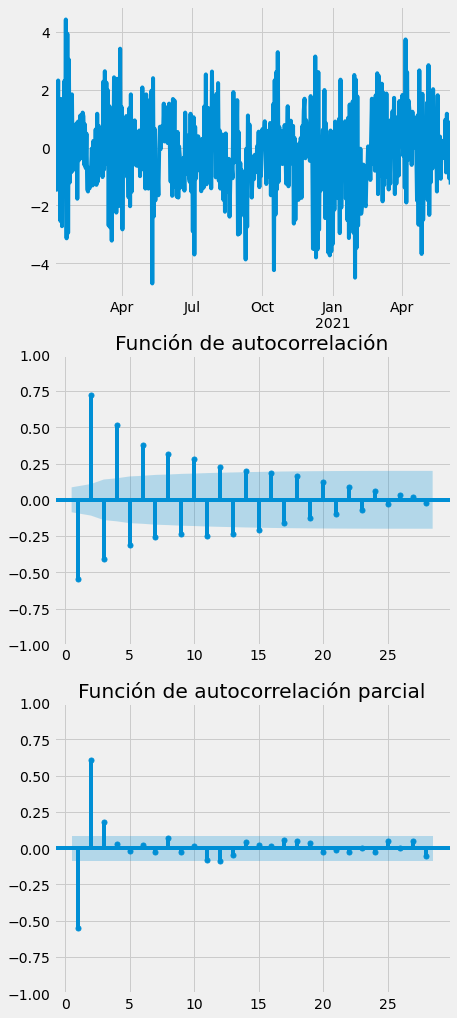

In [32]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
data.plot(ax=ax[0], xlabel = "")
plot_acf(data, zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(data, method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

In [33]:
test = adfuller(data)
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -7.5240555018
p-value: 	 	 3.724992856728523e-11


Como podemos ver en el grafico de la ACF ya no se ve un muy lento decaimiento, en su caso se puede ver que tiene una cola que decae de forma senoidal.
En la grafico de la PACF se ve un corte en el Lag 3. De forma grafica se podria pensar en un modelo ARIMA(2, 1, 0) pero se plantearan otros modelos para compararlos.

Para confirmar que ya no se necesitan hacer mas diferencias se hace de nuevo el test de Dickey-Fuller y se obtiene un rechazo de la hipotesis nula y se afirma que no hay raices unitarias, la serie con una diferencia es estacionaria.

## 4.

Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.

Se obtendran 9 modelos, estos rangos se eligieron observando las ACF y PACF

In [34]:
pdq_l = [(p, 1, q) for p in [1, 2, 3] for q in [0, 1, 2]] # ARIMA(0:3, 1, 0:2)

In [35]:
filas = []
for order in pdq_l:
    fit = ARIMA(data_no_diff, order=order).fit()
    aic = fit.aic
    bic = fit.bic
    filas.append([order, aic, bic])

In [36]:
pd.DataFrame(filas, columns=["order", "aic", "bic"])

,order,aic,bic
0,"(1, 1, 0)",1739.318754,1747.826412
1,"(1, 1, 1)",1618.543723,1631.305210
2,"(1, 1, 2)",1543.344586,1560.359901
3,"(2, 1, 0)",1486.407338,1499.168825
4,"(2, 1, 1)",1469.154777,1486.170092
5,"(2, 1, 2)",1470.789706,1492.058850
6,"(3, 1, 0)",1469.450375,1486.465691
7,"(3, 1, 1)",1470.813006,1492.082150
8,"(3, 1, 2)",1472.789176,1498.312149


De los resultados anteriores se puede ver que los dos mejores modelos son el ARIMA(2, 1, 1) y ARIMA(3, 1, 0), eligiré como mejor modelo al ARIMA(3, 1, 0) ya que el grafico ACF habia mostrado una cola.

In [37]:
modelo = ARIMA(data_no_diff, order=(3, 1, 0)).fit()

In [38]:
modelo.summary()
#modelo.test_serial_correlation(method = "ljungbox")[0][1].mean()
#modelo.test_normality(method = "jarquebera")[0][1] # p valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  521
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -730.725
Date:                Tue, 04 Oct 2022   AIC                           1469.450
Time:                        16:55:26   BIC                           1486.466
Sample:                    01-01-2020   HQIC                          1476.116
                         - 06-04-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3155      0.049     -6.463      0.000      -0.411      -0.220
ar.L2          0.6594      0.035     18.585      0.000       0.590       0.729
ar.L3          0.1889      0.047      4.058      0.000       0.098       0.280
sigma2         0.9703      0.054     17.910      0.000       0.864       1.077
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 7.11
Prob(Q):                              0.73   Prob(JB):                         0.03
Heteroskedasticity (H):               0.98   Skew:                            -0.17
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 5.

Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones abs y np.roots aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

Se obtiene que el mejor modelo es el siguiente:

$φ(B)(1 − B)^d X_t = α + θ(B)w_t$

$X_t - X_{t-1} = -0.3155 X_{t-1} + 0.6594	 X_{t-2} + 0.1889  X_{t-3} + w_t$

$w_t \sim N(0, 0.97)$

Las raices del modelo pueden obtenerse de la siguiente forma:


In [39]:
modelo.arroots # raices del modelo AR para 

array([ 1.24779929, -1.19852418, -3.53886425])

In [40]:
ar_p = [1, *-modelo.arparams] # modelo.arparams devuelve los parametros del modelo desde el lag 1 hasta el ultimo lag
ar_p.reverse()
abs(np.roots(ar_p))

array([3.53886425, 1.24779929, 1.19852418])

Como se puede observar las raices del proceso AR son mayores a 1 por lo que el proceso del modelo obtenido es estacionario. 

## 6.


Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.


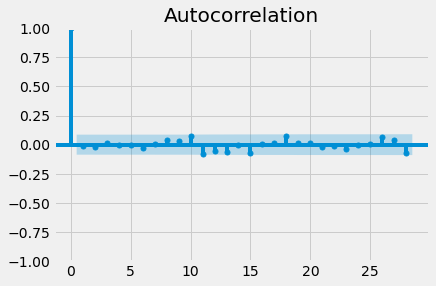

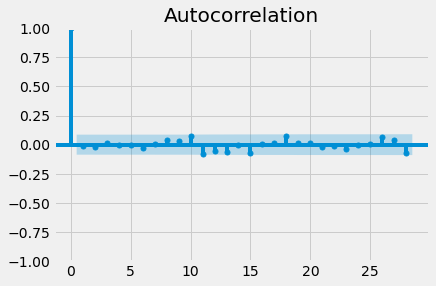

In [41]:
plot_acf(modelo.resid.dropna())

In [42]:
sm.stats.acorr_ljungbox(modelo.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.122619,0.726211
2,0.425716,0.808271
3,0.483302,0.922544
4,0.503890,0.973121
5,0.521026,0.991333
6,0.963940,0.986942
7,0.999804,0.994832
8,1.918770,0.983402
9,2.569351,0.978960
10,5.329654,0.868098


Como se puede ver en el grafico de la ACF y observando la tabla anterior, el test no rechaza la hipotesis nula en ningun lag desde 1 hasta 10 ya que todos los p-valores son bastante altos y mayores a un nivel de significancia del 0.05, por lo que se puede decir que la correlación entre los errores ($Corr[e_t, e_{t-h}]$) desde h = 1 hasta 10 es 0.

## 7.

Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

In [43]:
from scipy import stats
stats.jarque_bera(modelo.resid) # Con este se rechaza normalidad

Jarque_beraResult(statistic=6.894997814994965, pvalue=0.03182513452586999)

In [44]:
stats.shapiro(modelo.resid) # Con este no

ShapiroResult(statistic=0.9957191944122314, pvalue=0.16664007306098938)

Como se puede ver en la tabla anterior hay un problema, se obtiene un rechazo de la hipotesis nula de normalidad de los errores, se planteó usar el test de Shapiro-Wilk y con este test no se rechaza la normalidad de los errores. A juzgar por el siguiente grafico los errores parecen seguir muy bien los cuantiles teoricos, se afirmará que los errores son normales.


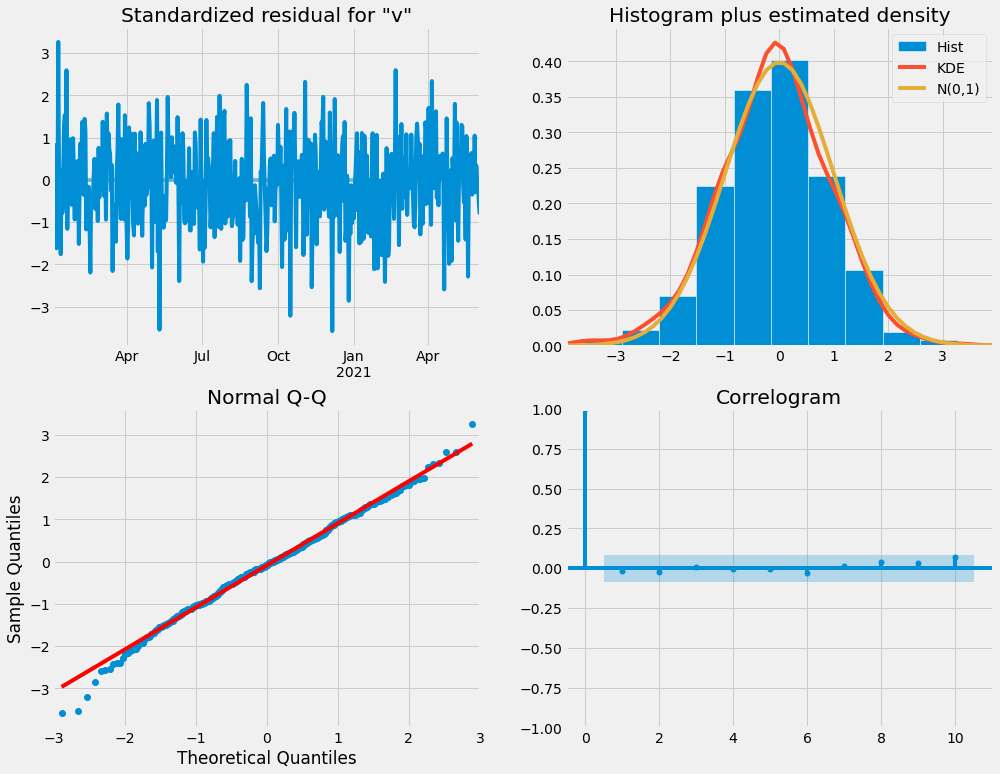

In [45]:
modelo.plot_diagnostics(figsize=(15,12))
plt.show()

## 8.

Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [46]:
data_no_diff.tail(1) # El ultimo valor es del mes 6 dia 4

,value
date,
2021-06-04,-94.24


In [47]:
fore = modelo.get_forecast(5)
fore_ci = fore.conf_int()
fore_ci

,lower value,upper value
2021-06-05,-95.967071,-92.105757
2021-06-06,-97.284231,-92.605017
2021-06-07,-98.404273,-91.127087
2021-06-08,-99.680421,-91.084592
2021-06-09,-100.657739,-89.825261


In [48]:
pred = modelo.get_prediction(start=len(data), end=len(data)+4, dynamic=False) 
# En este se empieza desde len(data) y no desde len(data) + 1 para que en el grafico se vea
# el "empate" entre el modelo y la predicción, pero si se usan estos datos 
# debe ignorarse el primer dato ya que es un dato ya observado

pred_ci = pred.conf_int(alpha = 0.05) # Intervalo de confianza 
pred_ci

,lower value,upper value
2021-06-04,-95.423297,-91.561984
2021-06-05,-95.967071,-92.105757
2021-06-06,-97.284231,-92.605017
2021-06-07,-98.404273,-91.127087
2021-06-08,-99.680421,-91.084592


Se observan los intervalos de confianza, el ancho del primer intervalo ($h = 1$) es de 3.86 unidades mientras que el ancho del ultimo ($h = 5$) es de 10.83.

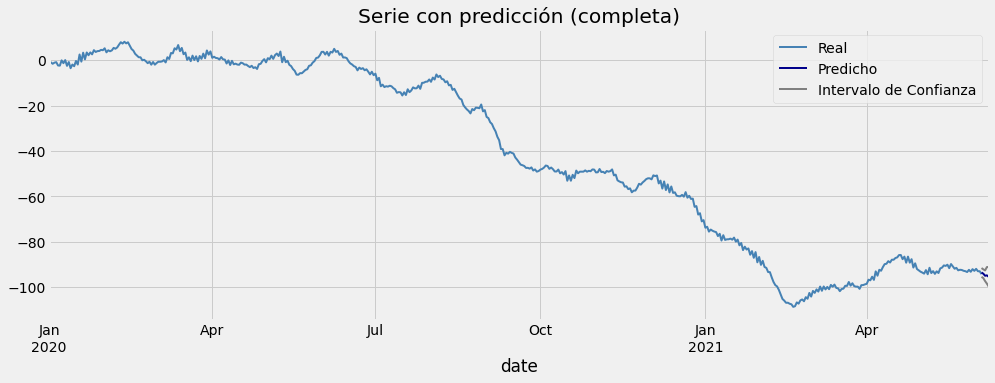

In [49]:
data_no_diff.plot(color = "steelblue", figsize=(15,5), linewidth = 2)
pred.predicted_mean.plot(color="darkblue", linewidth = 2, title = "Serie con predicción (completa)")
pred_ci.iloc[:,0].plot(color="gray", linewidth = 2)
pred_ci.iloc[:,1].plot(color="gray", linewidth = 2)
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])
plt.show()

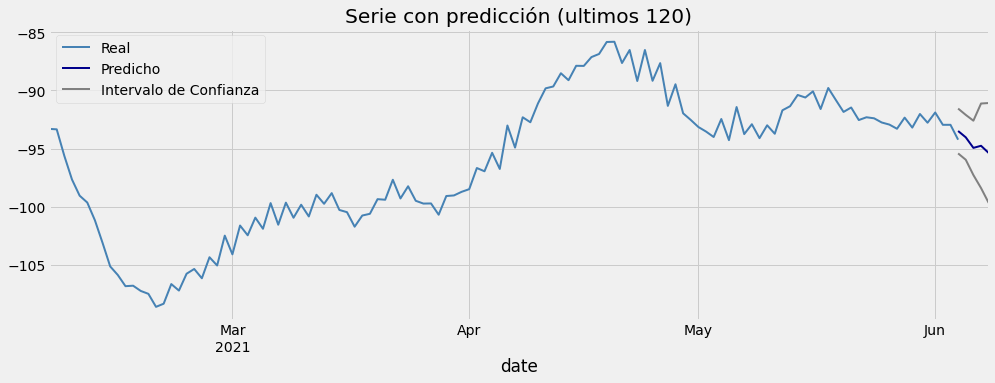

In [50]:
data_no_diff[(521-120):].plot(color = "steelblue", figsize=(15,5), linewidth = 2)
#[(521-120):] = totalfilas-120 en adelante = ultimas 120
pred.predicted_mean.plot(color="darkblue", linewidth = 2, title = "Serie con predicción (ultimos 120)")
pred_ci.iloc[:,0].plot(color="gray", linewidth = 2)
pred_ci.iloc[:,1].plot(color="gray", linewidth = 2)
# se le pone 1: para que empiece en el segundo valor (1) y no en el primero (0)
# y que no se vean dos valores en un mismo dia
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])
plt.show()

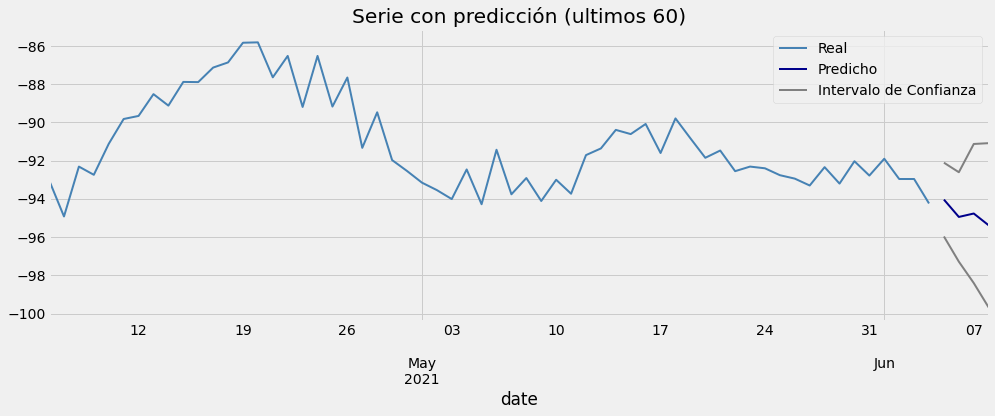

In [51]:
data_no_diff[(521-60):].plot(color = "steelblue", figsize=(15,5), linewidth = 2)
pred.predicted_mean.iloc[1:].plot(color="darkblue", linewidth = 2, title = "Serie con predicción (ultimos 60)")
pred_ci.iloc[1:,0].plot(color="gray", linewidth = 2)
pred_ci.iloc[1:,1].plot(color="gray", linewidth = 2)
# se le pone 1: para que empiece en el segundo valor (1) y no en el primero (0)
# y que no se vean dos valores en un mismo dia
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])
plt.show()

Como se puede observar el modelo predice que en los proximos 5 dias la serie va a tener un leve decaimiento.

In [52]:
pred_ci

,lower value,upper value
2021-06-04,-95.423297,-91.561984
2021-06-05,-95.967071,-92.105757
2021-06-06,-97.284231,-92.605017
2021-06-07,-98.404273,-91.127087
2021-06-08,-99.680421,-91.084592


In [53]:
pred.predicted_mean

2021-06-04   -93.492640
2021-06-05   -94.036414
2021-06-06   -94.944624
2021-06-07   -94.765680
2021-06-08   -95.382506
Freq: D, Name: predicted_mean, dtype: float64

Con un confianza del 95%. Se pronostica que: 
* Para el 2021-06-04 se espera que el  valor sea de -93.492640 que puede fluctuar entre un intervalo que va de -95.423297 hasta -91.561984. 

* Para el 2021-06-05 se espera que el  valor sea de -94.036414 que puede fluctuar entre un intervalo que va de -95.967071 hasta -92.105757. 

* Para el 2021-06-06   se espera que el  valor sea de -94.944624 que puede fluctuar entre un intervalo que va de -97.284231 hasta -92.605017. 

* Para el 2021-06-07   se espera que el  valor sea de -94.765680 que puede fluctuar entre un intervalo que va de -98.404273 hasta -91.127087. 

* Para el 2021-06-08  se espera que el  valor sea de -95.382506 que puede fluctuar entre un intervalo que va de -99.680421 hasta -91.084592.

Se puede observar que a medida que se pronostica más valores a futuro el intervalo de confianza se aumentá, perdiendo precisión en el pronóstico.

### <center> Serie de tiempo 3

### Breve exploración de la DB:

In [54]:
s3.shape

(837, 2)

In [55]:
s3.dtypes

dia         datetime64[ns]
registro           float64
dtype: object

In [56]:
s3.head()

,dia,registro
0,2020-03-07,-54.21
1,2019-07-24,26.12
2,2020-07-10,-16.74
3,2019-06-19,-1.54
4,2019-04-01,-1.67


In [57]:
s3.tail()

,dia,registro
832,2019-02-17,0.35
833,2019-04-17,-13.90
834,2021-04-14,-52.95
835,2019-03-25,-12.94
836,2019-08-19,42.46


In [58]:
s3.set_index("dia", inplace=True)
s3

,registro
dia,
2020-03-07,-54.21
2019-07-24,26.12
2020-07-10,-16.74
2019-06-19,-1.54
2019-04-01,-1.67
...,...
2019-02-17,0.35
2019-04-17,-13.90
2021-04-14,-52.95


In [59]:
s3.sort_values(by='dia', inplace = True)
s3

,registro
dia,
2019-01-01,1.37
2019-01-02,3.65
2019-01-03,5.86
2019-01-04,10.57
2019-01-05,14.17
...,...
2021-04-12,-59.77
2021-04-13,-56.04
2021-04-14,-52.95


Se lee y se carga la base de datos, la base de datos cuenta con 837 datos y 2 variables(fecha, valor) las cuales se procede a ordenar por fecha y a darle el formato adecuado a la serie de tiempo. Los datos van desde el 1 de enero del 2019 hasta el 16 de abril del 2021.

## 1. 

Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

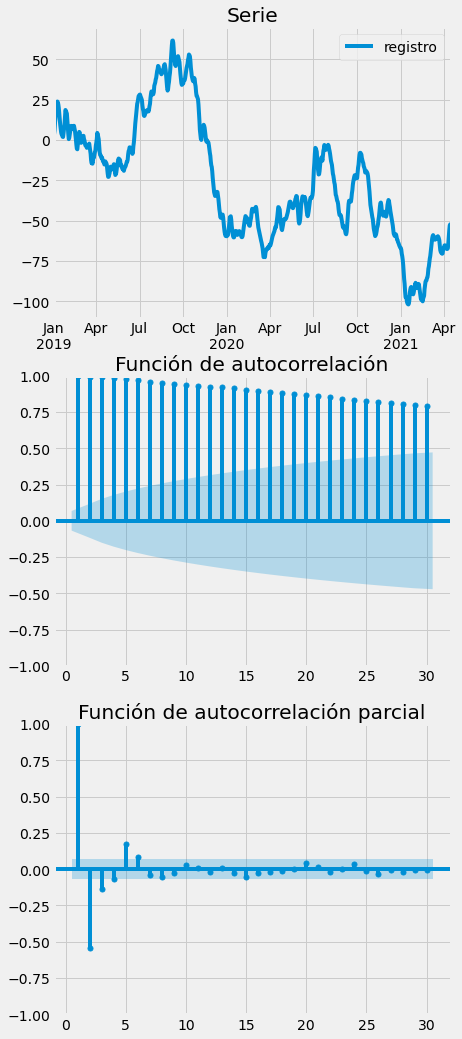

In [60]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
s3.plot(ax=ax[0], title = "Serie", xlabel="")
plot_acf(s3, zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(s3, method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

Del gráfico de la serie de tiempo no se observa que sea estacionaria, procedemos a observar la función de autocorrelación la cual presenta un decaimiento  exponencial lo cual nos da indicios de tener que hacer una diferenciación.

Se realizará una prueba de Dickey-Fuller para verificar si es necesario realizar una diferenciación.

## 2. 

Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.


In [61]:
test = adfuller(s3.dropna())
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -1.5245498355
p-value: 	 	 0.521333827352627


Observando el p-valor = 0.521333827352627 y con una significancia de $ \alpha = 0.05 $ no se rechaza. Esto quiere decir que no hay estacionaridad en la serie, lo que nos indica que debemos realizar una diferenciación.

## 3. 

Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

In [62]:
s3_aux_dif = s3.diff()
s3_aux_dif

,registro
dia,
2019-01-01,NaN
2019-01-02,2.28
2019-01-03,2.21
2019-01-04,4.71
2019-01-05,3.60
...,...
2021-04-12,4.27
2021-04-13,3.73
2021-04-14,3.09


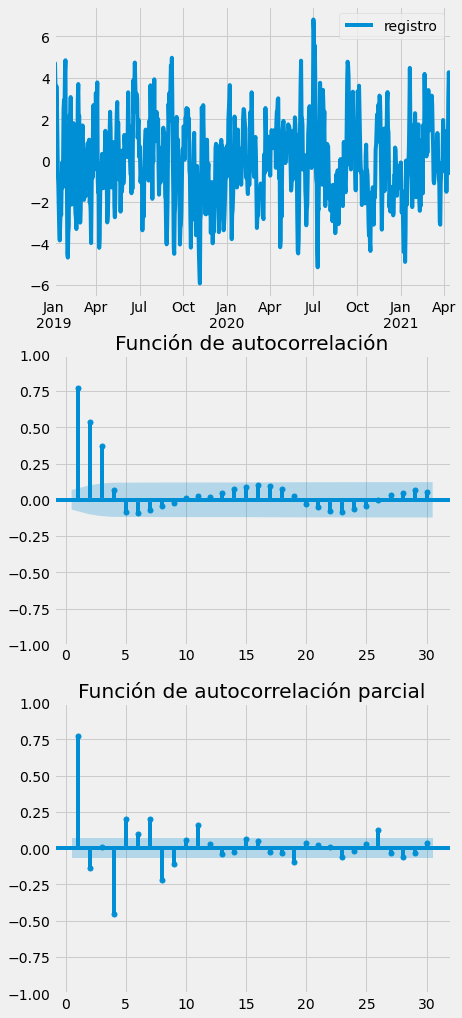

In [63]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
s3_aux_dif.plot(ax=ax[0], xlabel = "")
plot_acf(s3_aux_dif.dropna(), zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(s3_aux_dif.dropna(), method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

Despues de hacer una diferenciación y observando la serie diferenciada se obtiene estacionaridad alrededor de 0. Se realizara una prueba Dickey-Fuller para verificar si es necesario realizar otra diferencia.

In [64]:
test = adfuller(s3_aux_dif.dropna())
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -6.0876204756
p-value: 	 	 1.0550731533337157e-07


Se observa que la ACF cae mas rapidamente, una señal de que ya puede haber estacionariedad. Se realiza nuevamente la prueba de Dickey-Fuller y se obtiene un p-valor demasiado pequeño, se concluye que el problema de estacionariedad se resulve realizando una diferencia.

## 4. 
Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.m

Se van a entrenar 7 modelos basados en las graficas de la ACF y PACF y de la diferenciación necesaria para que la serie fuera estacionaria.

In [65]:
pdq_l = [(p, 1, q) for p in [1, 2, 4, 5, 7, 8, 11, 15] for q in [0, 1]]

In [66]:
filas = []
for order in pdq_l:
    fit = ARIMA(s3, order=order).fit()
    aic = fit.aic
    bic = fit.bic
    filas.append([order, aic, bic])

In [67]:
pd.DataFrame(filas, columns=["order", "aic", "bic"]).sort_values(["aic"])

,order,aic,bic
12,"(11, 1, 0)",2421.644875,2478.388418
14,"(15, 1, 0)",2421.893221,2497.551279
15,"(15, 1, 1)",2422.752354,2503.139040
13,"(11, 1, 1)",2423.119821,2484.591993
11,"(8, 1, 1)",2449.724787,2497.011073
10,"(8, 1, 0)",2453.410873,2495.968530
9,"(7, 1, 1)",2477.717957,2520.275614
8,"(7, 1, 0)",2495.317875,2533.146904
7,"(5, 1, 1)",2534.941578,2568.041979
6,"(5, 1, 0)",2535.291886,2563.663657


De la tabla anterior obtuvimos que el mejor modelo es el ARIMA(8, 1, 0) (el ARIMA(11, 1, 0) presentaba problemas de normalidad).

In [68]:
m = ARIMA(s3, order=(11, 1, 0)).fit()

In [69]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               registro   No. Observations:                  837
Model:                ARIMA(11, 1, 0)   Log Likelihood               -1198.822
Date:                Tue, 04 Oct 2022   AIC                           2421.645
Time:                        16:55:40   BIC                           2478.388
Sample:                    01-01-2019   HQIC                          2443.398
                         - 04-16-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9546      0.037     25.546      0.000       0.881       1.028
ar.L2         -0.1966      0.050     -3.898      0.000      -0.295      -0.098
ar.L3          0.5530      0.046     11.923      0.000       0.462       0.644
ar.L4         -0.8828      0.051    -17.178      0.000      -0.983      -0.782
ar.L5          0.1821      0.060      3.044      0.002       0.065       0.299
ar.L6         -0.0767      0.059     -1.294      0.196      -0.193       0.039
ar.L7          0.4974      0.058      8.634      0.000       0.384       0.610
ar.L8         -0.1951      0.051     -3.823      0.000      -0.295      -0.095
ar.L9         -0.1283      0.048     -2.683      0.007      -0.222      -0.035
ar.L10        -0.1093      0.048     -2.262      0.024      -0.204      -0.015
ar.L11         0.1710      0.034      5.033      0.000       0.104       0.238
sigma2         1.0264      0.047     21.741      0.000       0.934       1.119
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 7.03
Prob(Q):                              0.86   Prob(JB):                         0.03
Heteroskedasticity (H):               0.88   Skew:                             0.14
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Como podemos ver el modelo no tiene problemas de normalidad (no se rechaza normalidad en los residuos con el test de Kolmogorov-Smirnov cuando se compara con la CDF de una normal, esto se puede corroborar viendo el QQPlot)

In [70]:
stats.kstest(m.resid, stats.norm.cdf)

KstestResult(statistic=0.020720068057143937, pvalue=0.857474573012285)

## 5. 

Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

In [71]:
abs(m.arroots) # raices del modelo AR para 

array([1.31190873, 1.31190873, 1.18474565, 1.18474565, 1.11446203,
       1.11446203, 1.12629171, 1.12629171, 1.14575239, 1.14575239,
       1.17063913])

Se obtienen las raices para la parte autorregresiva y no se obtiene ninguna raiz adentro del circulo unitario, lo que es bueno ya que podemos afirmar que el proceso del modelo obtenido es estacionario.

## 6. 

Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.


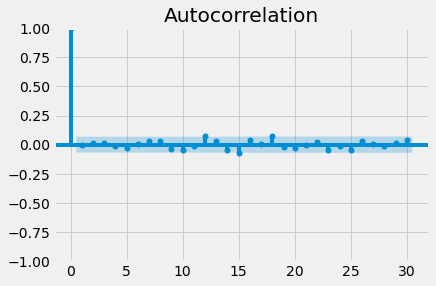

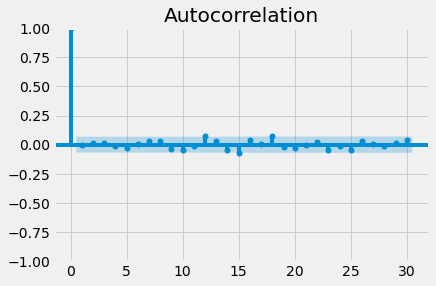

In [72]:
plot_acf(m.resid.dropna())

In [73]:
sm.stats.acorr_ljungbox(m.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.000691,0.979032
2,0.168602,0.919155
3,0.326529,0.954964
4,0.404618,0.982097
5,1.173454,0.947399
6,1.230225,0.975365
7,1.946728,0.962730
8,2.831017,0.944510
9,3.998225,0.911529
10,5.756402,0.835297


Como podemos ver en la ACF y la prueba enterior no se rechaza la hipotesis de residuos no correlacionados, incluso se puede observar que los p-valores toman valores muy grandes, hay una fuerte evidencia para afirmar la no correlación.

## 7. 
Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

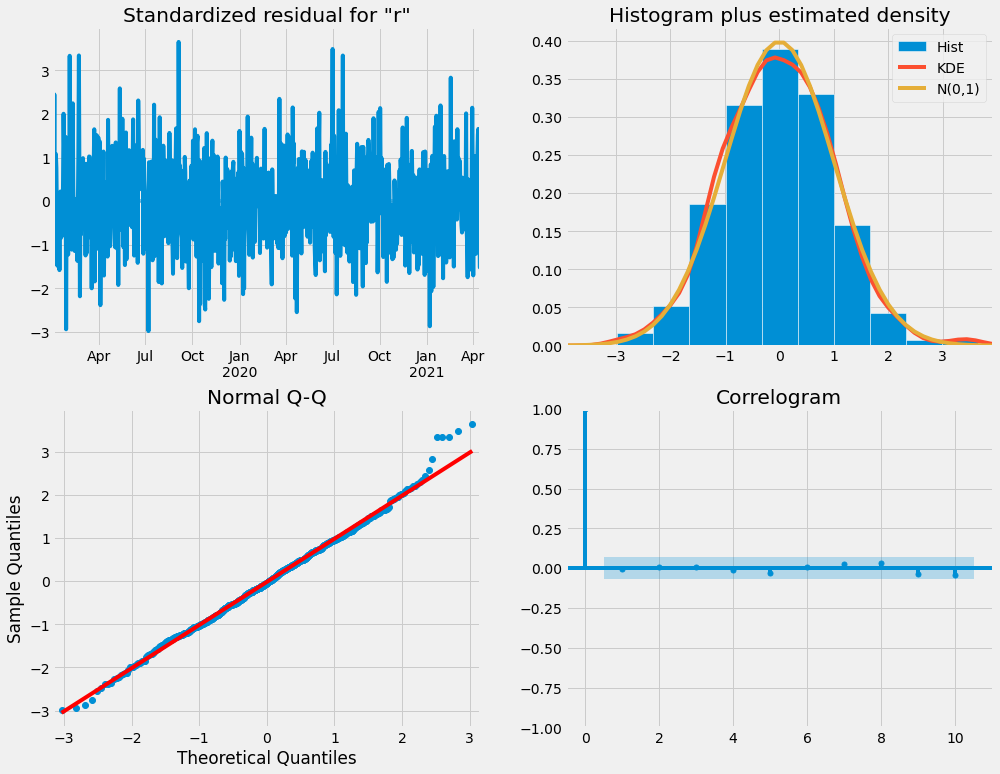

In [74]:
m.plot_diagnostics(figsize=(15,12))
plt.show()

En los graficos anteriores se puede ver que:

* Los errores tienen media 0
* La densidad de los errores se acerca mucho a una Normal(0, 1)
* El QQPlot evidencia graficamente normalidad de los errores
* El correlograma evidencia la poca correlación que se obtuvo igualmente con el test Ljung-Box

## 8. 

Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [75]:
# primera forma
fore = m.get_forecast(5)
fore_ci = fore.conf_int()
fore_ci

,lower registro,upper registro
2021-04-17,-56.421978,-52.450613
2021-04-18,-60.837254,-52.117956
2021-04-19,-64.248314,-50.522664
2021-04-20,-67.638289,-47.482463
2021-04-21,-70.708038,-44.491975


In [76]:
fore.predicted_mean

2021-04-17   -54.436296
2021-04-18   -56.477605
2021-04-19   -57.385489
2021-04-20   -57.560376
2021-04-21   -57.600007
Freq: D, Name: predicted_mean, dtype: float64

In [77]:
pred = m.get_prediction(start=len(s3), end=len(s3)+4, dynamic=False)
pred_ci = pred.conf_int(alpha=0.05) # Intervalo de confianza 
pred_ci

,lower registro,upper registro
2021-04-17,-56.421978,-52.450613
2021-04-18,-60.837254,-52.117956
2021-04-19,-64.248314,-50.522664
2021-04-20,-67.638289,-47.482463
2021-04-21,-70.708038,-44.491975


In [78]:
pred.predicted_mean

2021-04-17   -54.436296
2021-04-18   -56.477605
2021-04-19   -57.385489
2021-04-20   -57.560376
2021-04-21   -57.600007
Freq: D, Name: predicted_mean, dtype: float64

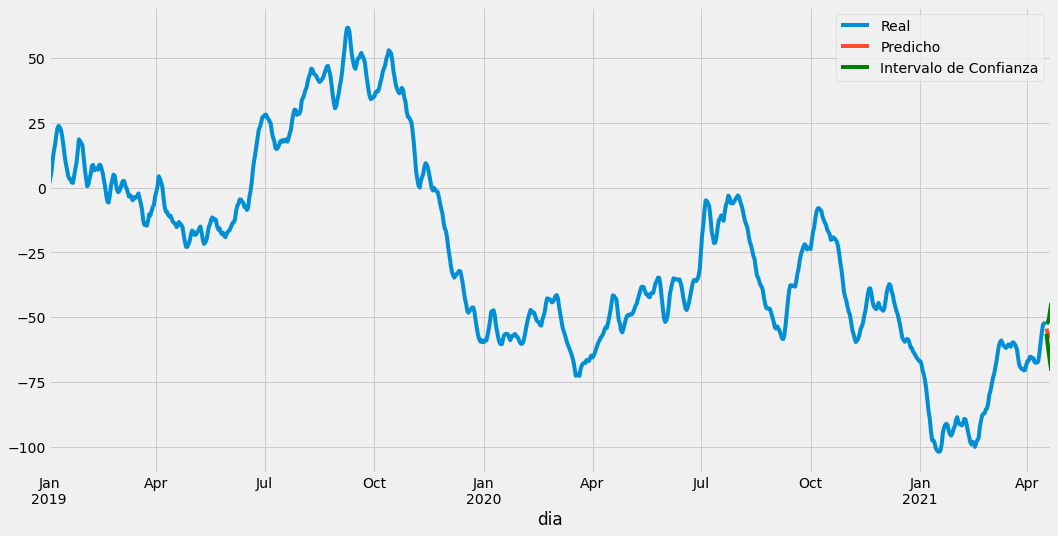

In [79]:
plt.figure(figsize=(16,8))  #  Graficamos:
s3.registro.plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])

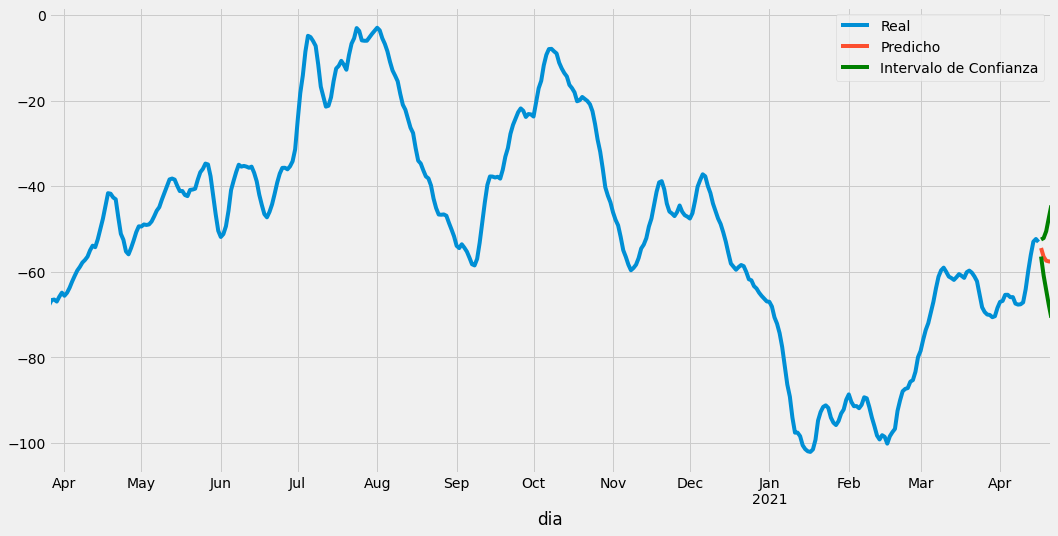

In [80]:
plt.figure(figsize=(16,8))  #  Graficamos:
s3[450:].registro.plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])

In [81]:
pred_ci

,lower registro,upper registro
2021-04-17,-56.421978,-52.450613
2021-04-18,-60.837254,-52.117956
2021-04-19,-64.248314,-50.522664
2021-04-20,-67.638289,-47.482463
2021-04-21,-70.708038,-44.491975


In [82]:
pred.predicted_mean

2021-04-17   -54.436296
2021-04-18   -56.477605
2021-04-19   -57.385489
2021-04-20   -57.560376
2021-04-21   -57.600007
Freq: D, Name: predicted_mean, dtype: float64

Con un confianza del 95%. Se pronostica que: 
* Para el 2021-04-17  se espera que el  valor sea de -54.436296 que puede fluctuar entre un intervalo que va de -56.421978 hasta -52.450613. 

* Para el 2021-04-18 se espera que el  valor sea de -56.477605 que puede fluctuar entre un intervalo que va de -60.837254 hasta -52.117956. 

* Para el 2021-04-19  se espera que el  valor sea de -57.385489 que puede fluctuar entre un intervalo que va de -64.248314 hasta -50.522664. 

* Para el 2021-04-20  se espera que el  valor sea de -57.560376 que puede fluctuar entre un intervalo que va de -67.638289 hasta -47.482463. 

* Para el 2021-04-21 se espera que el  valor sea de -57.600007 que puede fluctuar entre un intervalo que va de -70.708038 hasta -44.491975.

Se puede observar que a medida que se pronostica más valores a futuro el intervalo de confianza se aumentá, perdiendo precisión en el pronóstico.